In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
df = pd.read_excel('./data/COVID-19-geographic-disbtribution-worldwide.xlsx')
print(df.shape)
df.head(3)

(11152, 10)


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-16,16,4,2020,70,2,Afghanistan,AF,AFG,37172386.0
1,2020-04-15,15,4,2020,49,2,Afghanistan,AF,AFG,37172386.0
2,2020-04-14,14,4,2020,58,3,Afghanistan,AF,AFG,37172386.0


## Are we beating COVID-19 ?

We want to extract trends from the exponential growth of the epidemic. To do that, there are 3 key ideas :
- logarithmic scale (base 10)
- plot number of new cases (bell shape) instead of total number of cases (logistic scale)
- don't plot against time because the number of new cases depends on the current number of cases

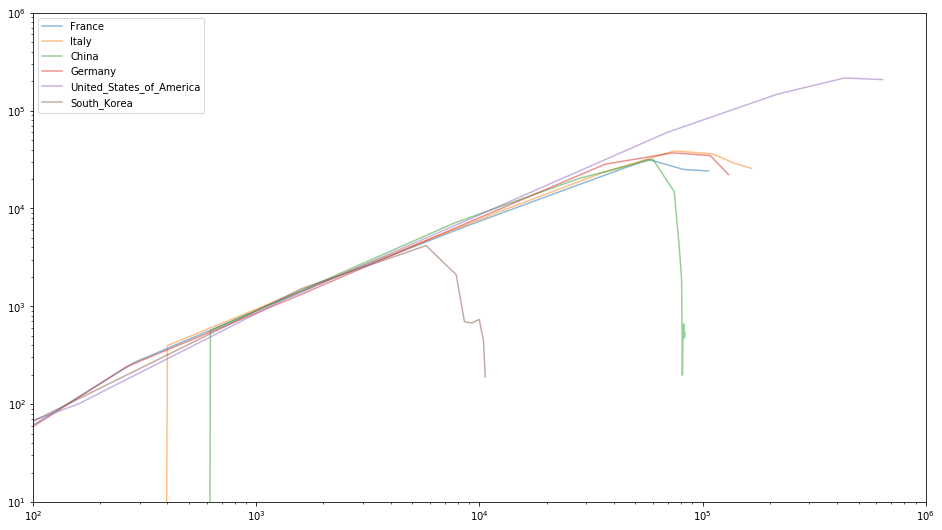

In [57]:
#countries = df.countriesAndTerritories.unique()
countries = ['France', 'Italy', 'China', 'Germany', 'United_States_of_America', 'South_Korea']
plt.figure(figsize=(16, 9))
plt.yscale('log')
plt.xscale('log')
plt.ylim(10, 1e6)
plt.xlim(100, 1e6)
for c in countries:
    tmp = df[df.countriesAndTerritories == c].sort_values('dateRep')
    new_confirmed_cases = tmp.cases.values
    new_confirmed_cases = [0] * (7 - new_confirmed_cases.shape[0] % 7) + list(new_confirmed_cases)
    new_confirmed_cases = np.reshape(new_confirmed_cases, (-1, 7)).sum(axis=1).reshape((-1, 1))
    total_confirmed_cases = np.cumsum(new_confirmed_cases)
    plt.plot(total_confirmed_cases, new_confirmed_cases, label=c, alpha=0.5)
plt.legend()
plt.show()

Limitations of this plot :
- time not shown
- confirmed cases != infections
- spread is slower because testing is increasing
- pessimistic graph because trend is calculated on a week scale